<a href="https://colab.research.google.com/github/snghx/ITB/blob/main/visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 시각화 과제
### 소비자경제학과 1913455 노승혜

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [18]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/f

In [2]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)


fm._rebuild()  # 폰트 적용

NanumMyeongjo


In [3]:
fpath = 'https://raw.githubusercontent.com/snghx/ITB/main/data/health_data.csv'
health = pd.read_csv(fpath)

In [4]:
print(health.isnull().sum())  #결측치 확인

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


#### Insight01

In [5]:
smoke = health[health['흡연상태'].notnull()]
# print(smoke.isnull().sum())

In [6]:
# 직관적인 결과 파악을 위해 문자형으로 결과값 변경
for i in smoke:
  smoke.loc[smoke['치아우식증유무'] == 0.0, '치아우식증유무'] = "없음"
  smoke.loc[smoke['치아우식증유무'] == 1.0, '치아우식증유무'] = "있음"
  smoke.loc[smoke['치석'] == 0.0, '치석'] = "없음"
  smoke.loc[smoke['치석'] == 1.0, '치석'] = "있음"
  smoke.loc[smoke['치석'] == 2.0, '치석'] = "측정불가"  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


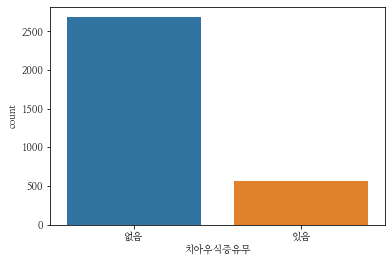

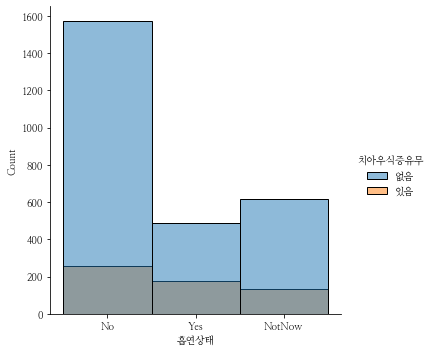

In [7]:
sns.countplot(data = smoke, x= '치아우식증유무') # graph1
sns.displot(smoke, x = "흡연상태", hue = "치아우식증유무") # graph2

**1. 치아우식증 유무**

  graph1에서 볼 수 있듯이, 전체 데이터 중에서 치아우식증이 있는 표본과 없는 표본과의 차이가 크기 때문에 흡연 여부에 따른 치아우식증 유무를 비교하기에 적절하지 않다고 판단했다.

  전체 데이터에서 치아우식증이 없는 데이터가 많았기에 흡연상태를 바탕으로 치아우식증 유무를 비교한 그래프(graph2)의 양상이 전체 데이터를 바탕으로 한 그래프(graph1)의 양상과 유사하게 나왔다.

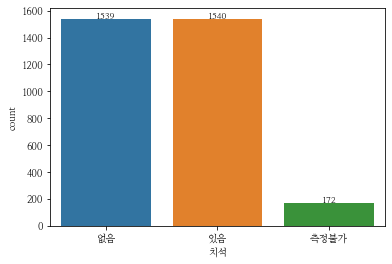

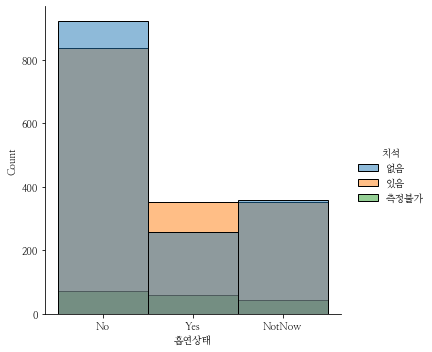

In [8]:
ax = sns.countplot(data = smoke, x = '치석') #graph3
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

sns.displot(smoke, x = "흡연상태", hue = "치석") #graph4

**2. 치석 유무**

  graph3에서 전체 데이터 내 치석유무의 표본 개수를 살펴보았다.
  치석이 있는 표본과 없는 표본의 차이가 크지 않았기에 흡연여부에 따른 치석유무를 살펴보았다.

  graph4에서 볼 수 있듯이, 현재 흡연 중인 사람 중 치석이 있는 경우가 더 많았고, 현재 흡연을 하고 있지 않은 사람 중에서는 치석이 없는 경우가 더 많았다.

  따라서, 흡연자이면서 치석이 있을 경우와 비흡연자이면서 치석이 없을 경우가 빈번함을 확인할 수 있다.

#### Insight02

In [9]:
age = health[health['총콜레스테롤'].notnull()]

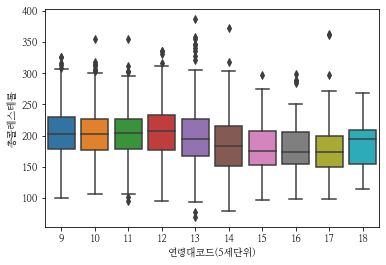

In [10]:
#sns.lineplot(data = age, x = '연령대코드(5세단위)', y = '총콜레스테롤', ci=None)
sns.boxplot(data = age, x = '연령대코드(5세단위)', y = '총콜레스테롤')

boxplot으로 각 연령별 총콜레스테롤 수치를 확인했을 때, 코드 13에 해당하는 60~64세에서 총콜레스테롤 수치가 극단적으로 높거나 낮은 이상치가 가장 많이 존재함을 볼 수 있다.

따라서 코드 13의 이상치를 평균으로 처리한 후, 연령별 총콜레스테롤 수치를 비교하고자 한다. 

In [11]:
# 이상치 처리
age.loc[age['연령대코드(5세단위)'] == 13, '총콜레스테롤'].describe()           
upper = 197.902004 + 2.575 * 43.647026      # 상한 : 표본평균 + 2.575 * 표준편차
low = 197.902004 - 2.575 * 43.647026        # 하한 : 표본평균 - 2.575 * 표준편차

age.loc[ (age['총콜레스테롤'] > upper) & (age['연령대코드(5세단위)']== 13), '총콜레스테롤'] = None
age.loc[ (age['총콜레스테롤'] < low) & (age['연령대코드(5세단위)']== 13), '총콜레스테롤'] = None

age = health[health['총콜레스테롤'].notnull()]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


상한과 하한은 표본평균 +- 2.575 * 표준편차로 설정한다. (2.575는 Z(a=0.01)의 값)

상한 이상의 값과 하한 이하의 값은 결측치(None)으로 처리한다.

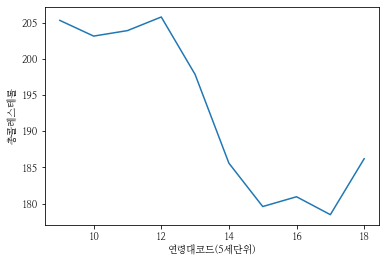

In [12]:
sns.lineplot(data = age, x = '연령대코드(5세단위)', y = '총콜레스테롤', ci=None)

**1. 연령별 총콜레스테롤 수치**

총콜레스테롤의 정상치는 150~250mg/dL으로, 전연령대 모두 평균적으로 정상수치를 보이고 있다.

12\~13코드에 해당하는 55세\~64세의 평균 총콜레스테롤 수치가 가장 높게 나타났고, 15\~17코드에 해당하는 70세\~84세의 평균 총콜레스테롤 수치가 가장 낮게 나타났다.

전반적으로는 우하향 후, 마지막에 다시 상승하는 양상을 보인다.

따라서 64세 이후로는 총콜레스테롤 수치가 떨어지다가, 80세 이상이 되면 다시 총콜레스테롤 수치가 상승한다는 것을 확인할 수 있다.

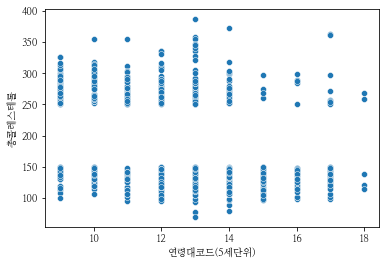

In [13]:
age1 = health[health['총콜레스테롤'].notnull()]

ageoutlier = age1.loc[(age1['총콜레스테롤'] > 250) | (age1['총콜레스테롤'] < 150)] # 정상치가 아닌 데이터 저장
sns.scatterplot(data = ageoutlier, x = '연령대코드(5세단위)', y = '총콜레스테롤')

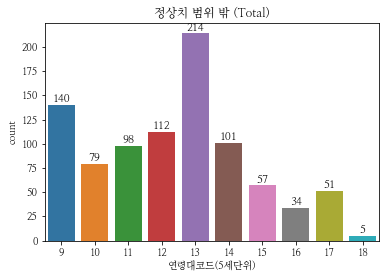

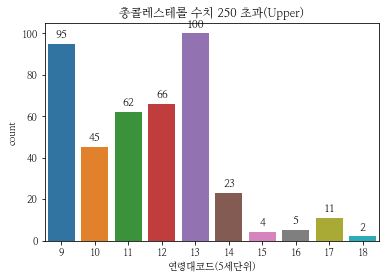

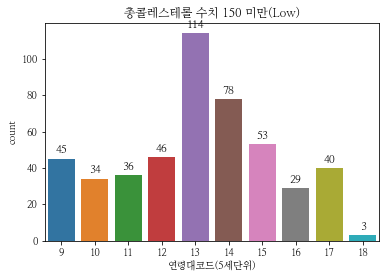

In [14]:
ageupper = age1.loc[(age1['총콜레스테롤'] > 250)]
agelow = age1.loc[(age1['총콜레스테롤'] < 150)]

ax1 = sns.countplot(data = ageoutlier, x = '연령대코드(5세단위)') #graph1
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.title("정상치 범위 밖 (Total)")
plt.show()

ax2 = sns.countplot(data = ageupper, x = '연령대코드(5세단위)') #graph2
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.title("총콜레스테롤 수치 250 초과(Upper)")
plt.show()

ax3 = sns.countplot(data = agelow, x = '연령대코드(5세단위)') #graph3
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.title("총콜레스테롤 수치 150 미만(Low)")
plt.show()


**2. 연령별 정상치 외의 수치**

총콜레스테롤 수치가 정상치 범위를 벗어난 데이터들을 모아 연령대별 분포를 확인했다.

산점도를 통해 총콜레스테롤 수치가 250 초과인 데이터들이 보다 넓게 분포되어 있고, 총콜레스테롤 수치가 150 미만인 데이터들은 상대적으로 밀집되어 존재하고 있음을 볼 수 있다.

---

countplot을 통해서는 정상치 범위를 벗어난 데이터들의 빈도수(graph1)와 상한 범위를 벗어난 데이터들의 빈도수(graph2), 하한 범위를 벗어난 데이터들의 빈도수(graph3)을 확인했다.

그 결과, 60\~64세에서 총콜레스테롤 수치가 정상치 범위를 벗어나는 경우가 많음을 알 수 있었다.

총콜레스테롤 수치가 250 초과로, 정상치보다 높으면 급성심근경색, 뇌경색 같은 질병이 생길 확률이 높아진다. 그렇기에 총콜레스테롤 수치가 정상치보다 높은 경우가 많은 40\~44세와 60\~64세에는 총콜레스테롤 수치를 낮추기 위해 기름진 음식을 피하는 식생활 개선과 적절한 운동이 필요하다.

총콜레스테롤 수치가 150 미만으로, 정상치보다 낮으면 우울증·정신장애·폭력·자살 등과도 연관되어 있기에 총콜레스테롤 수치가 정상치보다 낮은 경우가 많은 60\~69세에 집중하여 위와 같은 질환을 예방 및 해결하기 위한 방안을 고안할 필요가 있다.

#### Insight03

In [41]:
alcohol = health[ (health['음주여부'].notnull()) | (health['(혈청지오티)AST'].notnull()) | (health['(혈청지오티)ALT'].notnull())]

In [42]:
alcohol.groupby(['성별코드'])[['성별코드']].count()

,성별코드
성별코드,
F,4862
M,5138


In [46]:
alcohol_df = alcohol.loc[ alcohol['음주여부'] == "Yes", '음주여부']
alcohol_df.groupby(alcohol['성별코드']).count()

FYes = 2036 / 4862 * 100
MYes = 3783 / 5138 * 100

print("여성 음주 비율", FYes, "%")
print("남성 음주 비율", MYes, "%")

여성 음주 비율 41.875771287536 %
남성 음주 비율 73.62787076683534 %


데이터를 살펴보면, 술을 마시는 여성의 비율보다 술을 마시는 남성의 비율이 더 많다.

전체 데이터에서 성비의 차이가 존재하기 때문에 성별에 따라 데이터를 구분하여 시각화하고자 한다.

In [67]:
# 성별에 따라 데이터 분리
F_df = alcohol.loc[alcohol['성별코드'] == "F"]
M_df = alcohol.loc[alcohol['성별코드'] == "M"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '여성의 음주 여부에 따른 AST 수치')

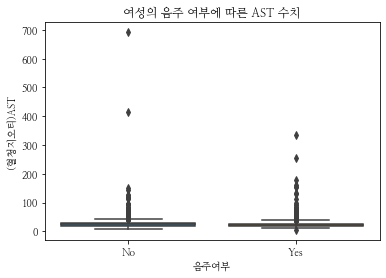

In [81]:
F_ax = sns.boxplot(F_df['음주여부'], F_df['(혈청지오티)AST'])
F_ax.set_title('여성의 음주 여부에 따른 AST 수치')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '남성의 음주 여부에 따른 AST 수치')

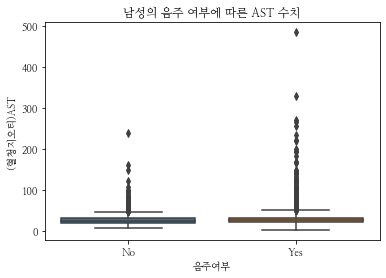

In [82]:
M_ax = sns.boxplot(M_df['음주여부'], M_df['(혈청지오티)AST'])
M_ax.set_title('남성의 음주 여부에 따른 AST 수치')

**1. 음주 여부에 따른 (혈청지오티)AST 수치 비교 (성별 구분하여 비교)**

여성과 남성 모두 음주 상태가 No(마시지 않는다)인 경우, 정상치인 0~40IU/L 범위 밖에 존재하는 outlier의 개수가 Yes(마신다)의 경우보다 적다.

여성의 경우, 음주상태가 No인 경우에서 정상치와의 거리가 큰 outlier가 존재하나, outlier의 개수는 음주상태가 Yes인 경우보다 확연하게 적으며 남성의 경우, 음주상태가 Yes인 경우가 No인 경우보다 outlier의 범위도 넓고, 그 수도 많음을 볼 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '여성의 음주 여부에 따른 ALT 수치')

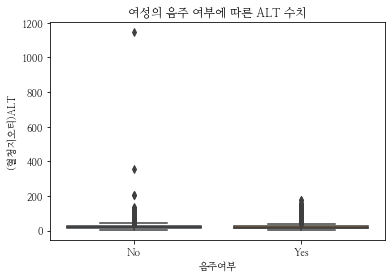

In [83]:
F_ax = sns.boxplot(F_df['음주여부'], F_df['(혈청지오티)ALT'])
F_ax.set_title('여성의 음주 여부에 따른 ALT 수치')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '남성의 음주 여부에 따른 ALT 수치')

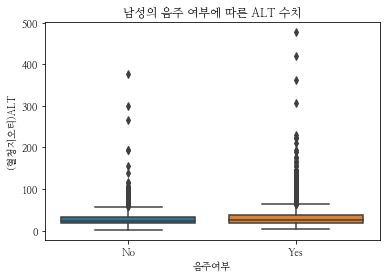

In [84]:
M_ax = sns.boxplot(M_df['음주여부'], M_df['(혈청지오티)ALT'])
M_ax.set_title('남성의 음주 여부에 따른 ALT 수치')

**2. 음주 여부에 따른 (혈청지오티)ALT 수치 비교 (성별 구분하여 비교)**

여성과 남성 모두 위에서 비교한 AST의 경우와 동일한 양상을 보인다.



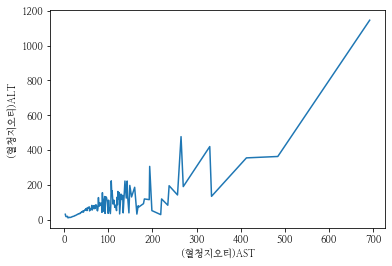

In [85]:
sns.lineplot(data = alcohol, x = alcohol['(혈청지오티)AST'], y = alcohol['(혈청지오티)ALT'], ci=None)

(혈청지오티)AST와 (혈청지오티)ALT는 전반적으로 양의 상관관계(비례관계)를 갖는다.

따라서 위 1번과 2번에서 비교한 그래프의 양상이 동일하게 나타났음을 이해할 수 있다.

---
여성과 남성 모두 음주상태가 Yes일 때 AST와 ALT의 수치가 정상치 이상인 경우가 많다.

이는 음주여부와 AST, ALT의 수치 향상이 유의미한 관계에 있음을 시사한다.

<img src = 'https://drive.google.com/uc?export=view&id=10P1JXkWUPpnxTmDTt42L_c0ZVzqk511-' align= "left" width = 50%>
<img src = 'https://drive.google.com/uc?export=view&id=1wjOkC3JMYVCjucO6WqFugNyKxq8wp8ic' align= "right" width = 50%>

01. AST 이상치 분포

  음주를 하는 여성의 AST 이상치는 50\~200 사이에 대부분 분포되어 있으며,

  음주를 하는 남성의 AST 이상치는 50\~250 사이에 대다수가 분포되어 있다.


02. ALT 이상치 분포
  음주를 하는 여성의 ALT 이상치는 50\~200 사이에 대부분 분포되어 있으며,

  음주를 하는 남성의 ALT 이상치는 50\~210 사이에 대부분 분포되어 있다.

즉, AST와 ALT 수치 모두 가벼운 증가 혹은 중간 정도의 증가에 해당하므로 음주를 하는 여성과 남성은 위 표에 해당하는 질병들을 조심할 필요가 있다.